## Demonstrate Bayesian updating for discrete posteriors, priors, and likelihoods


Let's say we picked one of two coins.  One isn't fair (pHeads = 0.45) while the other one is (pHeads = 0.5).  After a certain number of flips, what is our degree of belief that the results came from each of the coins?

Bayes rule for this example:

\begin{equation*}
p(Fair | Flips)   = \frac{p(Flips | Fair) * p(Fair)}{p(Flips)}
\end{equation*}

\begin{equation*}
p(Unfair | Flips) = \frac{p(Flips | Unfair) * p(Unfair)}{p(Flips)}
\end{equation*}

We know that:

$$ p(Fair) + p(Unfair) = 1 $$

We'll keep track of the probabilities in a list:  
$$ [p(Fair), p(Unfair)] $$ 
<br>
We *could* have done this example by only modeling $ p(Fair) $ or $ p(Unfair) $,
but this approach is extensible to problems that have more than just two solutions.  

For example, lets say there were three coins:  
* C1 p(Heads) = 0.25
* C2 p(Heads) = 0.1
* C3 p(Heads) = 0.5  

And we were to pick one, flip it many times, and based on the outcomes determine the probability that the flips came from each coin.  
Would keep probabilities in a list:  
$$ [p(C1), p(C2), p(C3)] $$ 

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16})

In [2]:
np.random.seed(37) # try to make it so that we all get the same result

# make the coins and select one
p_fair = 0.5 # don't change
p_not_fair = 0.45 # feel free to change (but don't use 0.5)
p = np.random.choice([p_fair, p_not_fair])

In [3]:
def indicate_coin_picked(p):
    fair = p == 0.5
    if fair:
        print("It's the fair coin (p = 0.5).")
    else:
        print(f"It's the unfair coin (p = {p}).")

In [4]:
# which coin did we get?
print(f"The coin's probability of heads is {p}.")
indicate_coin_picked(p)

The coin's probability of heads is 0.45.
It's the unfair coin (p = 0.45).


### Can we figure out, from the flips, whether it's a fair coin or not?  And if so, how soon can we know it?

In [5]:
# helper function 1

def flip_the_coin(p, flips_lst):
    '''Flips the coin with probability of success p
       and appends to the flips_lst'''
    if np.random.random() <= p:
        flips_lst.append(1) #heads (success)
    else:
        flips_lst.append(0) #tails (failure)

In [6]:
# test it out - initialize flips_lst
flips_lst = []

In [9]:
# do some flips (trials) - keep executing this cell
flip_the_coin(p, flips_lst)
print(flips_lst)

[1, 0, 0]


In [10]:
# helper function 2

def calculate_likelihood(flips_lst):
    '''Likelihood of flips in flips_lst given fair, not fair coin'''
    k_successes = sum(flips_lst)
    n_trials = len(flips_lst)
    likelihood_fair = stats.binom.pmf(k_successes, n_trials, p_fair)
    likelihood_not_fair = stats.binom.pmf(k_successes, n_trials, p_not_fair)
    return [likelihood_fair, likelihood_not_fair]

In [11]:
# test it out

flips_lst = [0,0,1,0,1,1] # assume these were the flips we got
likelihoods = calculate_likelihood(flips_lst)
print(np.around(likelihoods,3))
print("\nLikelihood fair: {0:0.3f}".format(likelihoods[0]))
print("Likelihood not fair: {0:0.3f}".format(likelihoods[1]))

[0.313 0.303]

Likelihood fair: 0.313
Likelihood not fair: 0.303


In [12]:
# helper function 3
marginal = 1  # placeholder, p(Flips) is same for both fair and unfair (see intro)

def calculate_posterior(likelihoods_lst, prior_lst):
    '''Calculates the posterior given the likelihoods and prior'''
    posterior_unnormalized = []
    for likelihood, prior in zip(likelihoods_lst, prior_lst):
        posterior_unnormalized.append(likelihood * prior / marginal)
    # now need to normalize so that the total probability in posterior is 1
    posterior_un_total = sum(posterior_unnormalized)
    posterior_lst = []
    for posterior in posterior_unnormalized:
        posterior_lst.append(posterior/posterior_un_total)
    return posterior_lst

In [13]:
# test it out

prior_lst = [0.5, 0.5]
likelihoods_lst = [0.312, 0.337]

posterior = calculate_posterior(likelihoods_lst, prior_lst)
print(posterior)
print("\nProbability fair: {0:0.3f}".format(posterior[0]))
print("Probability not fair: {0:0.3f}".format(posterior[1]))

[0.48073959938366717, 0.5192604006163328]

Probability fair: 0.481
Probability not fair: 0.519


### Put it all together - step through a simulation

In [14]:
# execute this cell only once (or before starting a new simulation)
np.random.seed(3)

# define the prior [our probability that we have the fair coin,   
# probability that we don't have the fair coin]
priors = [0.5, 0.5]

# initialize the flips list and the iteration number
flips_lst = []
i = 0

In [21]:
# Simulate - keep executing this cell to add flips

indicate_coin_picked(p)

# iteration number
i += 1
print(f"\nFlip {i}")

# execute this cell as many times as desired
print("Here are the flips:")
flip_the_coin(p, flips_lst)
print(flips_lst)

print("\nPriors")
print("Fair {0:0.3f}, Not fair {1:0.3f}".format(priors[0], priors[1]))

print("\nLikelihoods:")
likelihoods = calculate_likelihood(flips_lst)
print("Fair {0:0.3f}, Not fair {1:0.3f}".format(likelihoods[0], likelihoods[1]))

print("\nPosteriors:")
posteriors = calculate_posterior(likelihoods, priors)
print("Fair {0:0.3f}, Not fair {1:0.3f}\n".format(posteriors[0], posteriors[1]))

priors = posteriors

It's the unfair coin (p = 0.45).

Flip 6
Here are the flips:
[0, 0, 1, 0, 0, 0]

Priors
Fair 0.304, Not fair 0.696

Likelihoods:
Fair 0.094, Not fair 0.136

Posteriors:
Fair 0.232, Not fair 0.768



In [22]:
# helper function - plot the probability of the fair coin with time

def plot_pfair_prob(num_flips, p_fair_arr):
    fig, ax = plt.subplots(figsize=(12,4))
    flip_num = np.arange(1, num_flips + 1)
    ax.plot(flip_num, p_fair_arr)
    ax.set_ylim([-0.1, 1.1])
    ax.set_title('Probability of fair coin as a function of flip number')
    ax.set_ylabel('Probability p_fair')
    ax.set_xlabel('Flip number');
    plt.show()

The actual probability is 0.45.
It's the unfair coin (p = 0.45).

Posteriors after 5000 trials
Probability Fair 1.000, Not fair 0.000


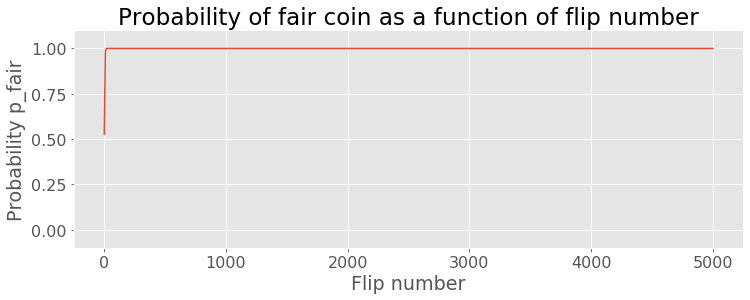

In [23]:
# lets do a simulation
np.random.seed(2) # try 2 and 3

print(f"The actual probability is {p}.")
indicate_coin_picked(p)

# initialize
priors = [0.5, 0.5]
flips_lst = []

# set the number of flips
num_flips = 5000
p_fair_arr = np.zeros(num_flips)

for i in range(num_flips):
    flip_the_coin(p, flips_lst)
    likelihoods = calculate_likelihood(flips_lst)
    posteriors = calculate_posterior(likelihoods, priors)
    p_fair_arr[i] = posteriors[0]
    priors = posteriors

print("\nPosteriors after {0} trials".format(num_flips))
print("Probability Fair {0:0.3f}, Not fair {1:0.3f}".format(posteriors[0], posteriors[1]))

plot_pfair_prob(num_flips, p_fair_arr)

### Seems very sensitive to updates.  Let's add a tuning dial (learning rate) that limits how much each update can affect the posteriors.

In [24]:
marginal = 1  # placeholder, p(Flips) is same for both fair and unfair (see intro)

def normalize(lst):
    total = sum(lst)
    return [val/total for val in lst]

def calculate_posterior_with_learning_rate(likelihoods_lst, prior_lst, learning_rate):
    '''Calculates the posterior given the likelihoods and prior'''
    posterior_unnormalized = []
    for likelihood, prior in zip(likelihoods_lst, prior_lst):
        posterior_unnormalized.append(likelihood * prior / marginal)
    
    # now need to normalize so that the total probability in posterior is 1
    posterior_lst = normalize(posterior_unnormalized)
    
    # now weight returned posterior by new posterior and old posterior
    posterior_weighted_unnorm = []
    for posterior, prior in zip(posterior_lst, prior_lst):
        posterior_weighted_unnorm.append(learning_rate * posterior + 
                                         (1 - learning_rate) * prior)
    posterior_weighted = normalize(posterior_weighted_unnorm)
    return posterior_weighted

The actual probability is 0.45.
It's the unfair coin (p = 0.45).

Posteriors after 5000 trials
Probability Fair 0.000, Not fair 1.000


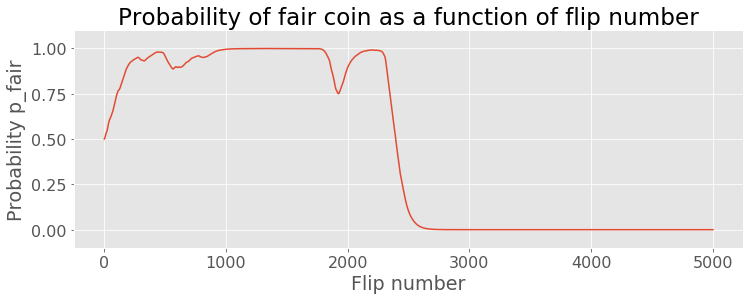

In [29]:
# lets do a simulation
np.random.seed(2) # try 3 and 2

print(f"The actual probability is {p}.")
indicate_coin_picked(p)

# initialize
priors = [0.5, 0.5]
learning_rate = 0.02
flips_lst = []

# set the number of flips
num_flips = 5000
p_fair_arr = np.zeros(num_flips)

for i in range(num_flips):
    flip_the_coin(p, flips_lst)
    likelihoods = calculate_likelihood(flips_lst)
    posteriors = calculate_posterior_with_learning_rate(likelihoods, priors, learning_rate)
    p_fair_arr[i] = posteriors[0]
    priors = posteriors

print("\nPosteriors after {0} trials".format(num_flips))
print("Probability Fair {0:0.3f}, Not fair {1:0.3f}".format(posteriors[0], posteriors[1]))

plot_pfair_prob(num_flips, p_fair_arr)